In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import warnings
warnings.filterwarnings("ignore")

dt_clf =DecisionTreeClassifier(random_state=156)

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [6]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, feature_names=iris_data.feature_names, impurity=True, filled=True)

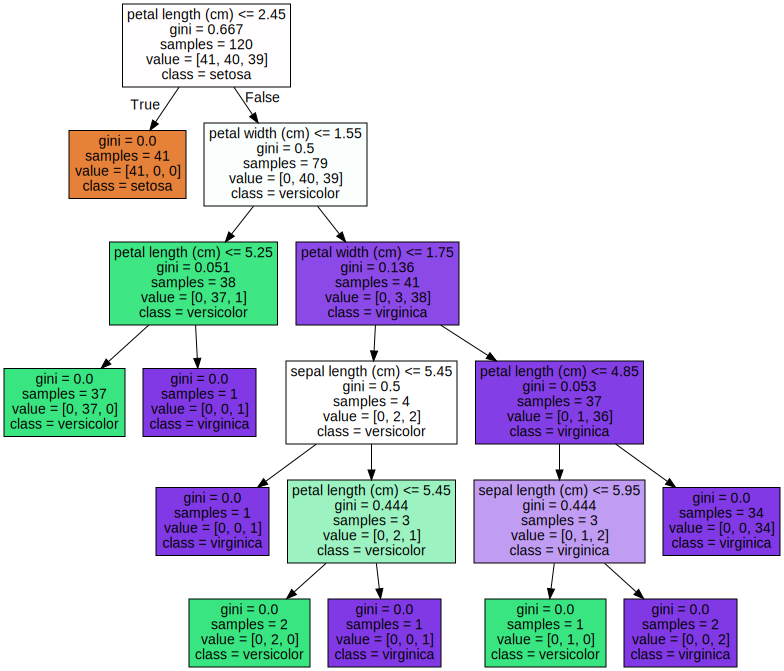

In [7]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm)  :   0.025
sepal width (cm)  :   0.000
petal length (cm)  :   0.555
petal width (cm)  :   0.420


<Axes: >

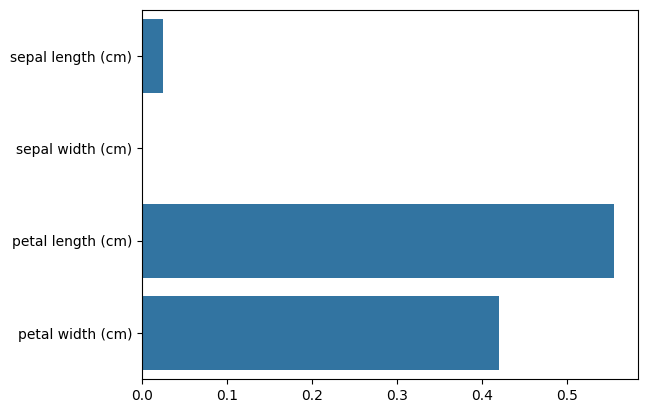

In [8]:
import seaborn as sns
import numpy as np
%matplotlib inline
#    feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))
#    feature별      importance 마I핑
for name,  value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0}  :   {1:.3f}'.format(name, value))
#    feature importance를    column  별로    시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

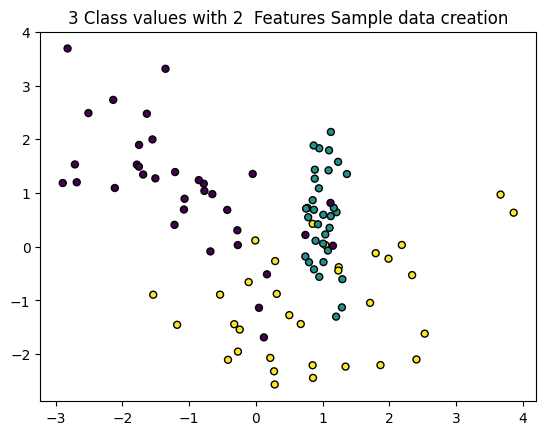

In [11]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("3 Class values with 2  Features Sample data creation")
#   2차원     시각화를    위해서     피처는    2개, 클래스는    3가지     유형의     분류    샘플    데이터     생성.
X_features, y_labels = make_classification(n_features=2, n_redundant=0,   n_informative=2,
n_classes=3, n_clusters_per_class=1,  random_state=0)
#   그래프    형태로    2개의     피처로   2차원     좌표    시각화,  각    클래스    값은    다른    색깔로    표시됨.
plt.scatter(X_features[:,   0], X_features[:, 1 ],   marker='o', c=y_labels, s=25,  edgecolor='k')

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def visualize_boundary(model, X, y):
    # Define the minimum and maximum values for X and Y
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    # Create a meshgrid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict the class for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Create a color map
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # Plot the decision boundary and the data points
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=25, edgecolor='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

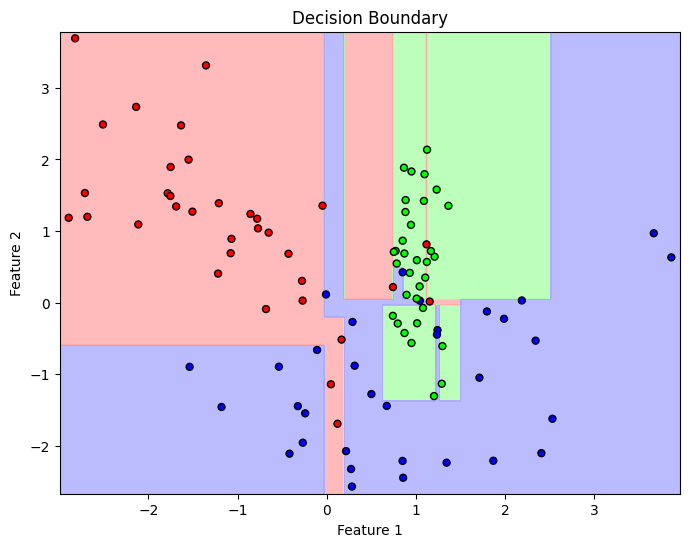

In [29]:
from sklearn.tree import DecisionTreeClassifier
# 특정한   트리     생성     제약    없는     결정     트리의     학습과    결정      경계     시각화.
dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf,  X_features, y_labels)

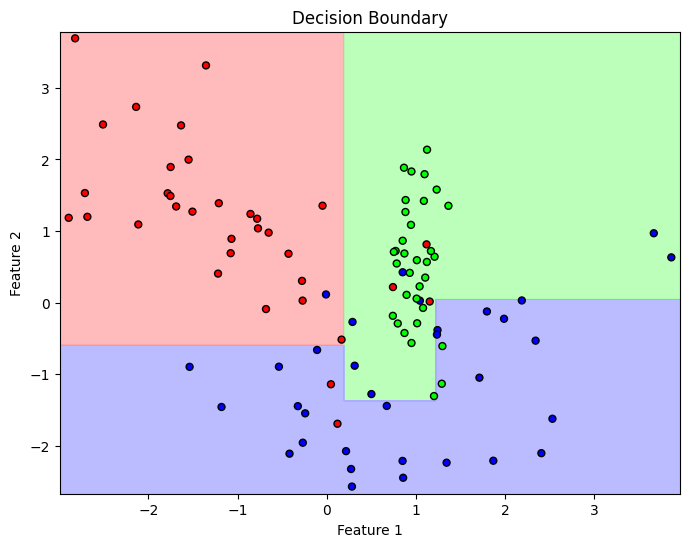

In [27]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=6,   random_state=156).fit(X_features,  y_labels)
visualize_boundary(dt_clf,  X_features, y_labels)

In [28]:
import pandas as pd
import matplotlib.pyplot as pit
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')
#   features.txt 파일에는    피처      이름    index와    피처명이     공백으로    분리되어     있음.  이를    DataFrame으로    로드.
feature_name_df = pd .read_csv('/content/drive/MyDrive/human_activity/features.txt', sep='\s+',
header=None,  names=['column_index',   'column_name'])
#   피처명     index를    제거하고, 피처명만    리스트    객체로    생성한    뒤      샘플로    10개만    추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체    피처명에서     10개만    추출:', feature_name[:10])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
전체    피처명에서     10개만    추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [17]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df [feature_dup_df [  'column_index'] >  1] .count())
feature_dup_df[feature_dup_df['column_index']  >  1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [19]:
def get_new_feature_name_df(old_feature_name_df):
    dup_cnt = old_feature_name_df.groupby("column_name").cumcount()
    new_feature_name_df = old_feature_name_df.copy()
    new_feature_name_df["dup_cnt"] = dup_cnt
    new_feature_name_df["column_name"] = new_feature_name_df.apply(
        lambda x: f"{x['column_name']}_{x['dup_cnt']}" if x["dup_cnt"] > 0 else x["column_name"],
        axis=1
    )
    return new_feature_name_df.drop(columns=["dup_cnt"])

In [20]:
import pandas as pd
def get_human_dataset():
  feature_name_df = pd.read_csv('/content/drive/MyDrive/human_activity/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])
  new_feature_name_df = get_new_feature_name_df(feature_name_df)
  feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
  X_train = pd.read_csv('/content/drive/MyDrive/human_activity/train/X_train.txt', sep='\s+', names=feature_name)
  X_test = pd.read_csv('/content/drive/MyDrive/human_activity/test/X_test.txt', sep='\s+', names=feature_name)
  y_train = pd.read_csv('/content/drive/MyDrive/human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
  y_test = pd.read_csv('/content/drive/MyDrive/human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])
  return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = get_human_dataset()
print('## 학습    피처     데이터셋    info()')
print (X_train. info())

## 학습    피처     데이터셋    info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [21]:
print(y_train['action'].value_counts())

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#    예제     반복    시마다   동일한    예측    결과   도출을    위해    random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train,   y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정    트리     예측    정확도:  {0:.4f}'. format (accuracy))
#    DecisionTreeClassifier의      하이퍼     파라미터     추출
print('DecisionTreeClassifier 기본    하이퍼     파라미터:\n',  dt_clf.get_params())

결정    트리     예측    정확도:  0.8548
DecisionTreeClassifier 기본    하이퍼     파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 156, 'splitter': 'best'}


In [23]:
#max_depth 활용
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=156)

params = {"max_depth": [6, 8, 10, 12, 16, 20, 24], "min_samples_split": [16]}
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring="accuracy", cv=5, verbose=1)
grid_cv.fit(X_train, y_train)

print("최고 평균 정확도:{0:.4f}".format(grid_cv.best_score_))
print("최적 하이퍼 파라미터:", grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
최고 평균 정확도:0.8549
최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [33]:
#   GridSearchCV 객체의     cv_results_ 속성을    DataFrame으로    생성  .
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
#   max_depth 파라미터     값과    그때의     테스트    세트, 학습    데이터     세트의     정확도    수치     추출
cv_results_df[['param_max_depth',   'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


In [31]:
for depth in [6, 8, 10, 12, 16, 20, 24]:
    dt_clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=16, random_state=156)
    dt_clf.fit(X_train, y_train.values.ravel())
    pred = dt_clf.predict(X_test)
    acc = accuracy_score(y_test, pred)
    print(f"max_depth={depth}, 정확도={acc:.4f}")


max_depth=6, 정확도=0.8551
max_depth=8, 정확도=0.8717
max_depth=10, 정확도=0.8599
max_depth=12, 정확도=0.8571
max_depth=16, 정확도=0.8599
max_depth=20, 정확도=0.8565
max_depth=24, 정확도=0.8565


In [53]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier

# y가 DataFrame이면 1차원으로 펼쳐주기(미묘하게 느려지는 문제/경고 방지)
y_tr = np.ravel(y_train)
params = {
    'max_depth': [8, 12, 16, 20],
    'min_samples_split': [16, 24],
}
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring="accuracy", cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('최고 평균 정확도: {0:.4f}'.format(grid_cv.best_score_))
print('최적 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
최고 평균 정확도: 0.8549
최적 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [54]:
best_df_clf = grid_cv.best_estimator_
predl = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, predl)
print('결정    트리     예측    정확도:{0:.4f}'.format(accuracy))

결정    트리     예측    정확도:0.8717


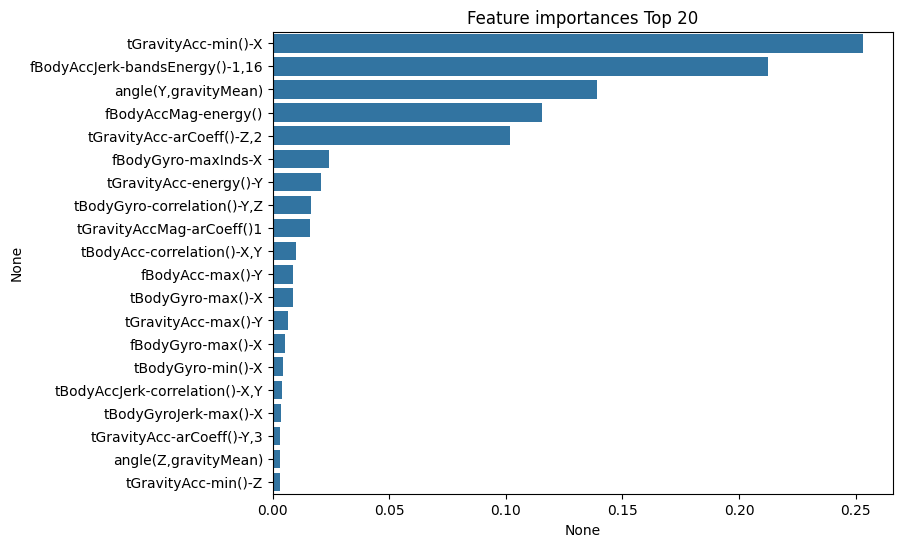

In [55]:
import seaborn as  sns
ftr_importances_values = best_df_clf.feature_importances_
#   Top 중요도로    정렬을    쉽게     하고, 시본(Seaborn)의      막대그래프로    쉽게     표현하기     위해     Series 변환
ftr_importances = pd.Series(ftr_importances_values,  index=X_train.columns   )
# 중요도값    순으로   Series를    정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
pit.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y = ftr_top20.index)
plt.show()

In [39]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
cancer = load_breast_cancer()
data_df = pd.DataFrame(cancer.data,  columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [43]:
#   개별     모델은    로지스틱     회귀와    KNN임.
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)
#   개별     모델을    소프트   보팅     기반의     앙상블    모델로    구현한    분류기
vo_clf = VotingClassifier( estimators=[('LR',  lr_clf), ('KNN', knn_clf)], voting='soft'           )
X_train,   X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
test_size=0.2, random_state= 156)
#   VotingClassifier 학습/예측/평가.
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기     정확도:  {0:.4f}'.format(accuracy_score(y_test, pred)))
classifiers = [lr_clf,  knn_clf]
for classifier in classifiers:
  classifier.fit(X_train, y_train)
  pred = classifier.predict(X_test)
  class_name= classifier.__class__.__name__
  print('{0} 정확도:  {1:.4f}'.format(class_name, accuracy_score(y_test,   pred)))

Voting 분류기     정확도:  0.9561
LogisticRegression 정확도:  0.9474
KNeighborsClassifier 정확도:  0.9386


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
#   결정     트리에서     사용한   get_human_dataset(  )를    이용해     학습/테스트용    DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()
#   랜덤     포레스트    학습    및     별도의     테스트    세트로    예측    성능    평가
rf_clf = RandomForestClassifier(random_state=0, max_depth=8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print( '랜덤    포레스트    정확도:  {0: .4f}' .format(accuracy))

랜덤    포레스트    정확도:   0.9220


In [47]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth':[8,  16,24],
'min_samples_leaf' : [1, 6, 12],
'min_samples_split' : [2, 8, 16]
}


#  RandomForestClassifier 객체     생성     후    GridSearchCV 수행
rf_clf = RandomForestClassifier(n_estimators=100,  random_state=0,  n_jobs=-1)
grid_cv = GridSearchCV(rf_clf ,   param_grid=params  ,   cv=2,  n_jobs=-1  )
grid_cv.fit(X_train ,  y_train)
print('최적     하이퍼     파라미터:\n',   grid_cv.best_params_)
print('최고   예측    정확도:  {0:.4f}'.format(grid_cv.best_score_))

최적     하이퍼     파라미터:
 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 16}
최고   예측    정확도:  0.9157


In [49]:
rf_clf1 = RandomForestClassifier(n_estimators=100,   min_samples_leaf=6,   max_depth=16,
min_samples_split=2,  random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측    정확도:  {0: .4f}'.format(accuracy_score(y_test ,   pred)))

예측    정확도:   0.9253


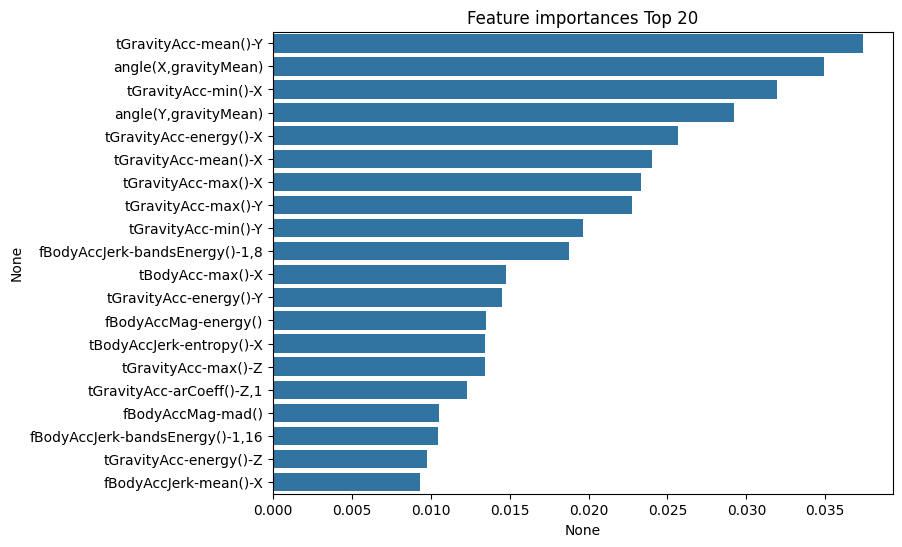

In [51]:
import matplotlib.pyplot as plt
import seaborn as  sns
%matplotlib inline
ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,  index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20,  y=ftr_top20.index)
plt.show()